important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccX' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-11'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccX is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(7960, 32)

**前回やった学習をもう１度やってみる**

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.1835 - val_loss: 0.0237
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0182 - val_loss: 0.0141
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0116 - val_loss: 0.0094
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 0.0084 - val_loss: 0.0074
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 0.0070 - val_loss: 0.0066
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0059
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0055
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 0.0052 - val_loss: 0.0050
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
7960/7960 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0035
Epoch 11/50
7960/7960

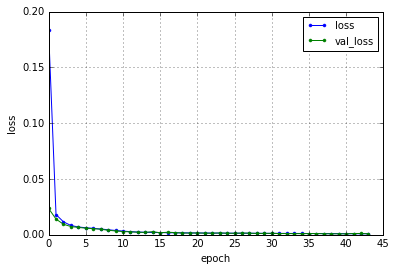

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.1075 - val_loss: 0.0156
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0113 - val_loss: 0.0082
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0068 - val_loss: 0.0056
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 0.0050 - val_loss: 0.0043
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 0.0038 - val_loss: 0.0032
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 0.0029 - val_loss: 0.0027
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 0.0024 - val_loss: 0.0021
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0018
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
7960/7960 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0016
Epoch 11/50
7960/7960

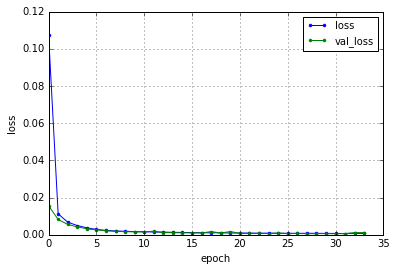

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 5s - loss: 0.1033 - val_loss: 0.0140
Epoch 2/50
7960/7960 [==============================] - 5s - loss: 0.0104 - val_loss: 0.0081
Epoch 3/50
7960/7960 [==============================] - 5s - loss: 0.0069 - val_loss: 0.0058
Epoch 4/50
7960/7960 [==============================] - 5s - loss: 0.0050 - val_loss: 0.0041
Epoch 5/50
7960/7960 [==============================] - 5s - loss: 0.0037 - val_loss: 0.0031
Epoch 6/50
7960/7960 [==============================] - 5s - loss: 0.0027 - val_loss: 0.0023
Epoch 7/50
7960/7960 [==============================] - 5s - loss: 0.0022 - val_loss: 0.0020
Epoch 8/50
7960/7960 [==============================] - 5s - loss: 0.0019 - val_loss: 0.0016
Epoch 9/50
7960/7960 [==============================] - 5s - loss: 0.0016 - val_loss: 0.0015
Epoch 10/50
7960/7960 [==============================] - 5s - loss: 0.0015 - val_loss: 0.0012
Epoch 11/50
7960/7960

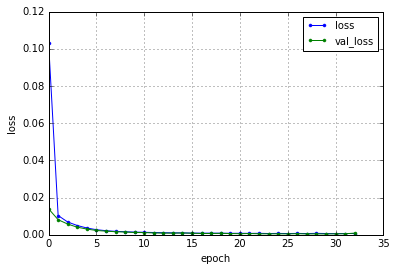

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 5s - loss: 0.1004 - val_loss: 0.0111
Epoch 2/50
7960/7960 [==============================] - 5s - loss: 0.0082 - val_loss: 0.0064
Epoch 3/50
7960/7960 [==============================] - 5s - loss: 0.0054 - val_loss: 0.0043
Epoch 4/50
7960/7960 [==============================] - 5s - loss: 0.0036 - val_loss: 0.0027
Epoch 5/50
7960/7960 [==============================] - 5s - loss: 0.0025 - val_loss: 0.0020
Epoch 6/50
7960/7960 [==============================] - 5s - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
7960/7960 [==============================] - 5s - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
7960/7960 [==============================] - 5s - loss: 0.0015 - val_loss: 0.0013
Epoch 9/50
7960/7960 [==============================] - 5s - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
7960/7960 [==============================] - 5s - loss: 0.0012 - val_loss: 9.9619e-04
Epoch 11/50
7960/

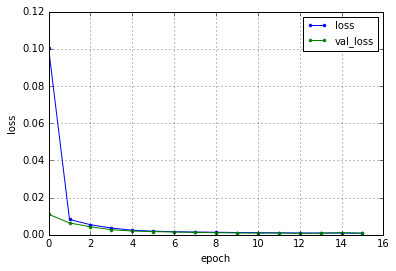

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 5s - loss: 0.0560 - val_loss: 0.0072
Epoch 2/50
7960/7960 [==============================] - 5s - loss: 0.0049 - val_loss: 0.0031
Epoch 3/50
7960/7960 [==============================] - 5s - loss: 0.0026 - val_loss: 0.0020
Epoch 4/50
7960/7960 [==============================] - 5s - loss: 0.0019 - val_loss: 0.0019
Epoch 5/50
7960/7960 [==============================] - 5s - loss: 0.0015 - val_loss: 0.0012
Epoch 6/50
7960/7960 [==============================] - 5s - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
7960/7960 [==============================] - 5s - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
7960/7960 [==============================] - 5s - loss: 9.8635e-04 - val_loss: 0.0016
Epoch 9/50
7960/7960 [==============================] - 5s - loss: 9.7887e-04 - val_loss: 6.5957e-04
Epoch 10/50
7960/7960 [==============================] - 5s - loss: 8.5129e-04 - val_loss: 6.5018e-04
E

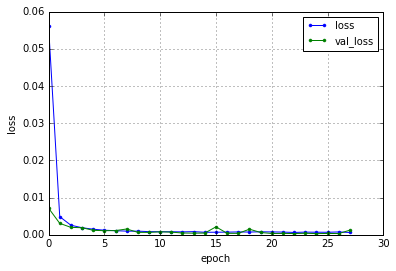

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 5s - loss: 0.0302 - val_loss: 0.0023
Epoch 2/50
7960/7960 [==============================] - 5s - loss: 0.0017 - val_loss: 0.0011
Epoch 3/50
7960/7960 [==============================] - 5s - loss: 0.0011 - val_loss: 9.7816e-04
Epoch 4/50
7960/7960 [==============================] - 5s - loss: 0.0010 - val_loss: 7.1996e-04
Epoch 5/50
7960/7960 [==============================] - 5s - loss: 9.6152e-04 - val_loss: 8.7381e-04
Epoch 6/50
7960/7960 [==============================] - 5s - loss: 8.9925e-04 - val_loss: 6.4517e-04
Epoch 7/50
7960/7960 [==============================] - 5s - loss: 9.4123e-04 - val_loss: 7.3712e-04
Epoch 8/50
7960/7960 [==============================] - 6s - loss: 8.7956e-04 - val_loss: 5.7107e-04
Epoch 9/50
7960/7960 [==============================] - 5s - loss: 7.6869e-04 - val_loss: 4.0293e-04
Epoch 10/50
7960/7960 [==============================] - 5s - loss:

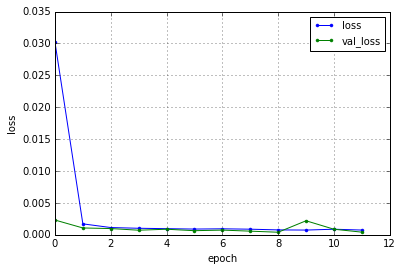

In [9]:
# define SaveFileName
for encoding_dim in EncodingDim:
    SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

    window_test=windoW
    window_train=windoW
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
    shapeNum=windoW.shape[1]

    # this is our input placeholder
    input_img = Input(shape=(shapeNum,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='tanh')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(shapeNum, activation='linear')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input=input_img, output=encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adadelta', loss='mse')
    plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)
    hist = autoencoder.fit(window_train, window_train,
                    nb_epoch=50,
                    batch_size=shapeNum/4,
                    shuffle=True,
                    validation_data=(window_test, window_test),
                    callbacks=[early_stopping])

    encoded_imgs = encoder.predict(window_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

    # save model and wights
    json_string = encoder.to_json()
    open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
    encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

    json_string = decoder.to_json()
    open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
    decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

    json_string = autoencoder.to_json()
    open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
    autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

    # plot loss
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    nb_epoch = len(loss)
    plt.plot(range(nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(SaveFileNameGlaph)
    plt.show()